In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import tensorflow as tf
import numpy as np
import importlib
from os.path import join

import task
importlib.reload(task)
from task import generate_trials

import train
importlib.reload(train)
from train import get_default_hp

from network import Model

import my_rnn_functions as mrnn
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

In [3]:
import network
importlib.reload(network)
from network import get_network_modules_params, generate_weight_masks_and_EI_lists
module_params = get_network_modules_params(hp)
w_masks_all, EI_lists = generate_weight_masks_and_EI_lists(hp, module_params)

NameError: name 'hp' is not defined

In [1]:
plt.plot(w_masks_all['sen_input'][0,:])

NameError: name 'plt' is not defined

(65, 65)
(2, 2)
(500, 500)
(33, 33)
(67, 67)


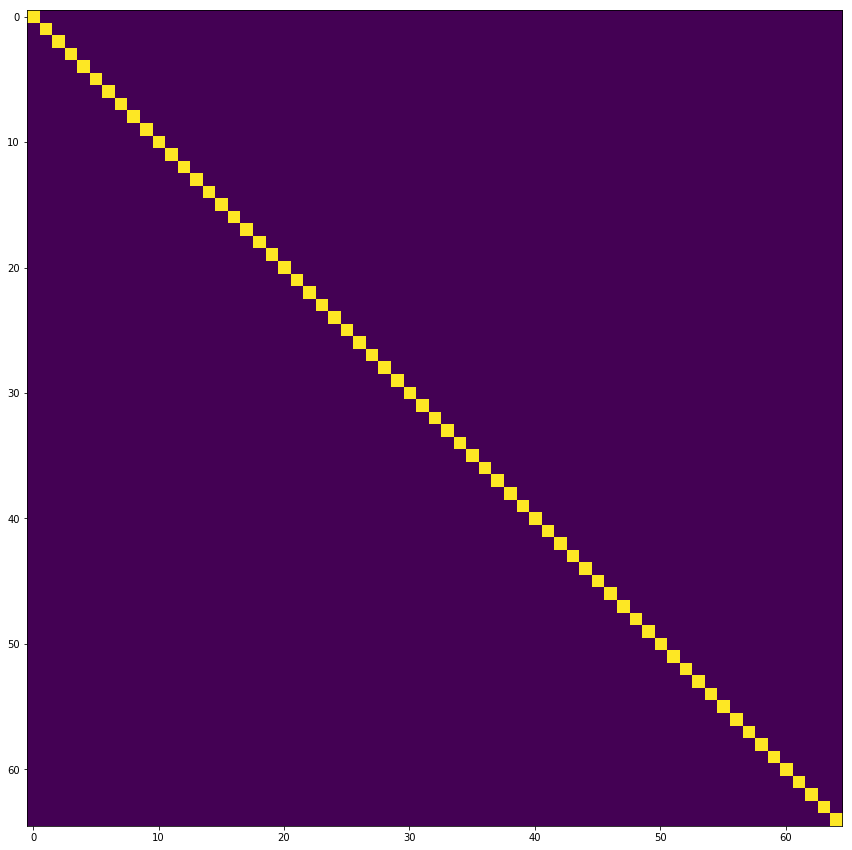

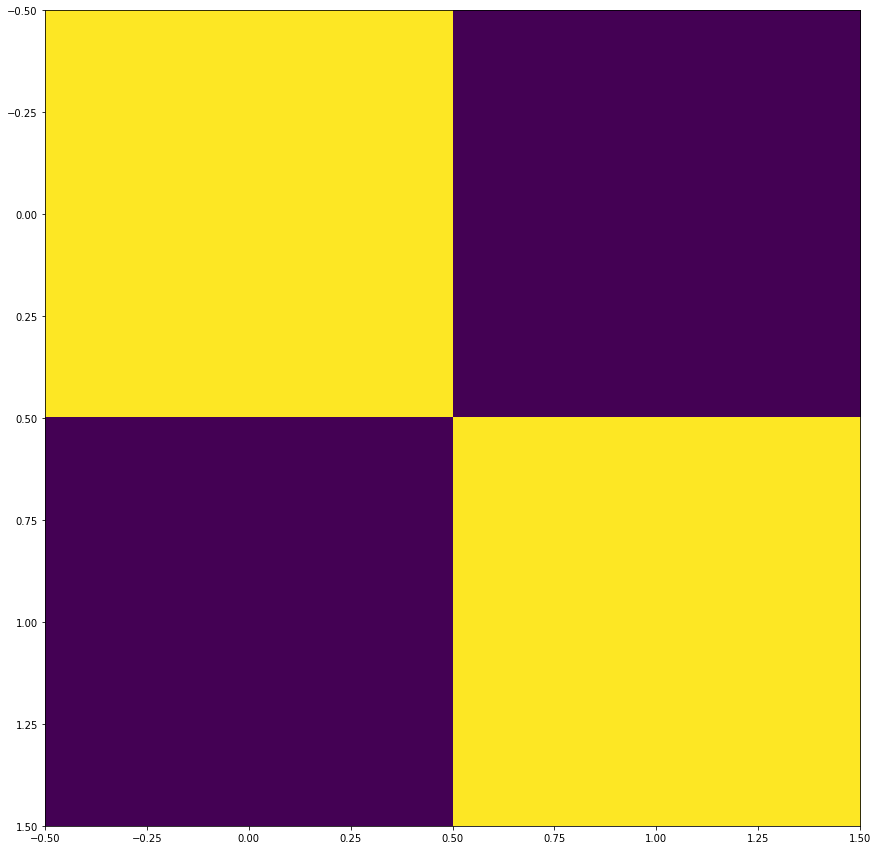

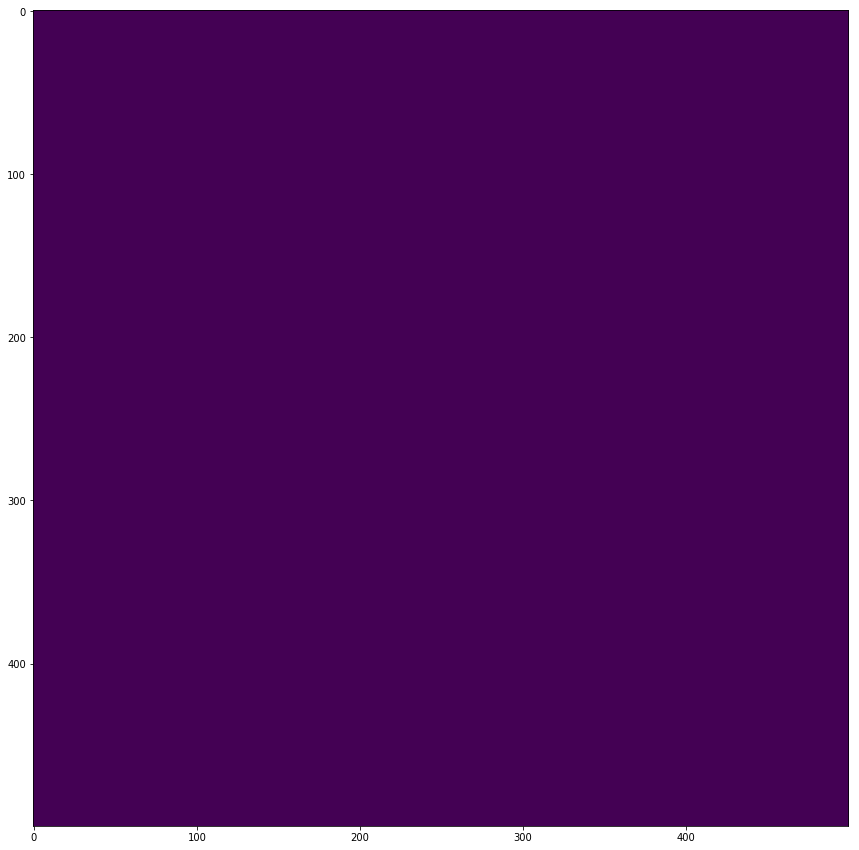

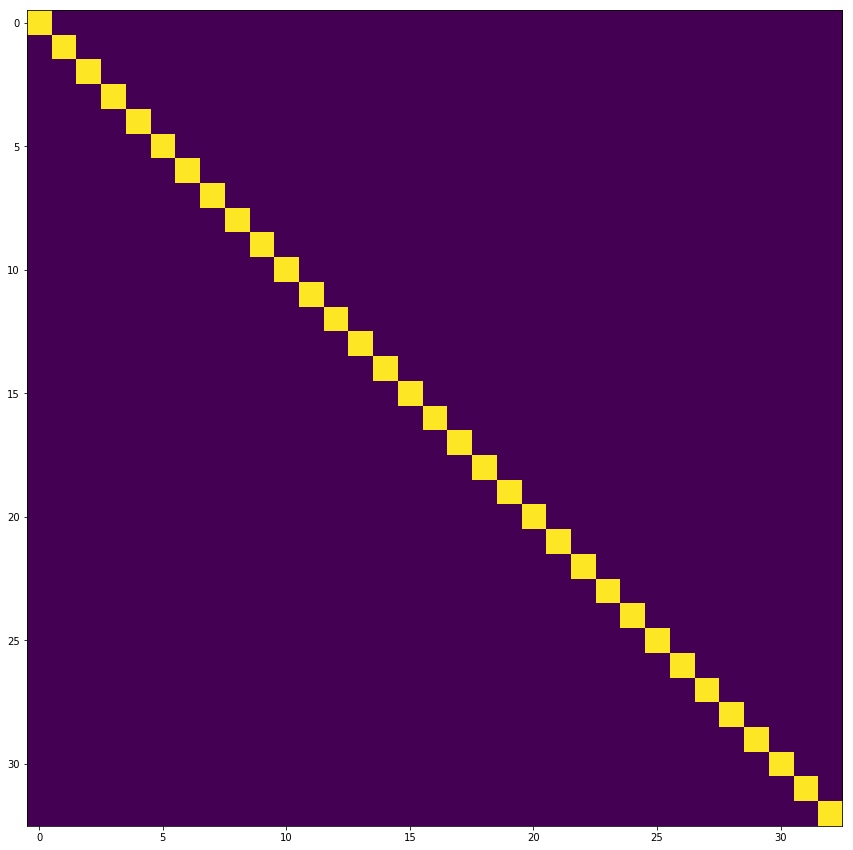

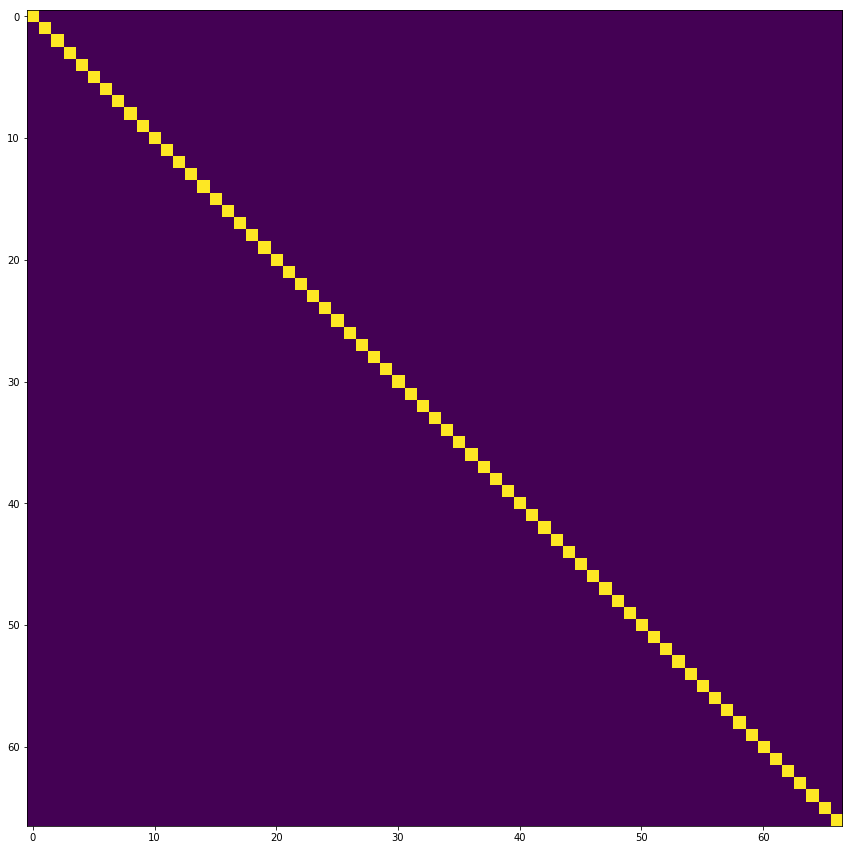

In [21]:
for _, mask in EI_matrices.items():
    print(mask.shape)
    plt.figure(figsize=[15,15])
    plt.imshow(mask)

In [ ]:

def generate_EI_matrices(hp):
    """Generates a dict with diagonal matrices defining whether units are excitatory or inhibitory

    Args:
        hp: network hyperparameters

    Returns:
        EI_matrices: Dictionary with masks for each type of weight

    """
    
    if 'exc_input_and_output' in hp and hp['exc_input_and_output']:
        EI_matrices = {'sen_input': np.diag(np.ones([1+hp['num_ring']*hp['n_eachring']])),
                      'rule_input': np.diag(np.ones([hp['n_rule']])),
                      'input': np.diag(np.ones([1+hp['num_ring']*hp['n_eachring']+hp['n_rule']])),
                      'rnn': np.zeros([hp['n_rnn'], hp['n_rnn']]),
                      'output': np.diag(np.ones([hp['n_rnn']]))
                      }    
    else:
        EI_matrices = {'sen_input': np.zeros([1+hp['num_ring']*hp['n_eachring'],hp['n_rnn']]),
                      'rule_input': np.zeros([hp['n_rule'],hp['n_rnn']]),
                      'input': np.zeros([1+hp['num_ring']*hp['n_eachring']+hp['n_rule'], hp['n_rnn']]),
                      'rnn': np.zeros([hp['n_rnn'], hp['n_rnn']]),
                      'output': np.zeros([hp['n_rnn'], hp['n_output']])
                      }


    if 'exc_inh_RNN' in hp and hp['exc_inh_RNN']:

        hp['n_exc_units'] = int(np.round(hp['n_rnn']*hp['exc_inh_prop']))
        hp['n_inh_units'] = hp['n_rnn'] - hp['n_exc_units']

        EI_list = np.ones(hp['n_rnn'], dtype=np.float32)
        EI_list[-hp['n_inh_units']:] = -1.

        ind_inh = np.where(EI_list==-1)[0]

        EI_matrices['rnn'] = np.diag(EI_list)
        
    return 

In [45]:
if 'exc_input_and_output' in hp and hp['exc_input_and_output']:
    EI_matrices = {'sen_input': np.diag(np.ones([1+hp['num_ring']*hp['n_eachring']])),
                  'rule_input': np.diag(np.ones([hp['n_rule']])),
                  'input': np.diag(np.ones([1+hp['num_ring']*hp['n_eachring']+hp['n_rule']])),
                  'rnn': np.zeros([hp['n_rnn'], hp['n_rnn']]),
                  'output': np.diag(np.ones([hp['n_rnn']]))
                 }    
else:
    EI_matrices = {'sen_input': np.zeros([1+hp['num_ring']*hp['n_eachring'],hp['n_rnn']]),
                  'rule_input': np.zeros([hp['n_rule'],hp['n_rnn']]),
                  'input': np.zeros([1+hp['num_ring']*hp['n_eachring']+hp['n_rule'], hp['n_rnn']]),
                  'rnn': np.zeros([hp['n_rnn'], hp['n_rnn']]),
                  'output': np.zeros([hp['n_rnn'], hp['n_output']])
                  }
    

if 'exc_inh_RNN' in hp and hp['exc_inh_RNN']:
    
    hp['n_exc_units'] = int(np.round(hp['n_rnn']*hp['exc_inh_prop']))
    hp['n_inh_units'] = hp['n_rnn'] - hp['n_exc_units']

    EI_list = np.ones(hp['n_rnn'], dtype=np.float32)
    EI_list[-hp['n_inh_units']:] = -1.

    ind_inh = np.where(EI_list==-1)[0]

    EI_matrices['rnn'] = np.diag(EI_list)
    

In [77]:
model_dir = './saved_models/debug'

hp = {'learning_rate': 0.001, 'n_rnn': 100, 'target_perf': 0.95,
          'use_separate_input': False, 'activation': 'relu',
          'use_w_mask': True, 'w_mask_type': 'basic_TC'}
ruleset='contextdelaydm_MD_task'  #ctx_multi_sensory_delay
default_hp = get_default_hp(ruleset)
if hp is not None:
    default_hp.update(hp)
hp = default_hp
hp['seed'] = 1
hp['rng'] = np.random.RandomState()
hp['rule_trains'] = task.rules_dict[ruleset]

rule_train_now = hp['rng'].choice(hp['rule_trains'])

trial = generate_trials(
    rule_train_now, hp, 'random',
    batch_size=hp['batch_size_train'])


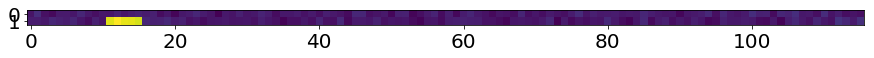

In [78]:
plt.figure(figsize=[15,15])
plt.imshow(trial.x[:,0,hp['rule_start']:].T)

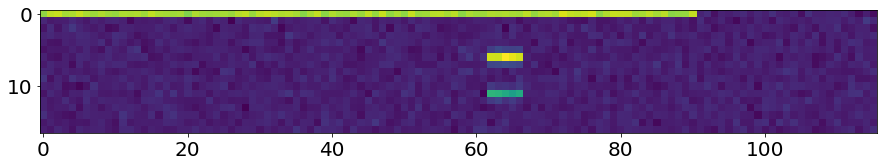

In [79]:
plt.figure(figsize=[15,15])
plt.imshow(trial.x[:,0,:hp['rule_start']].T)

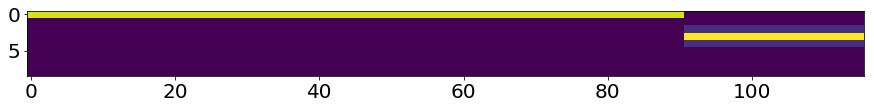

In [80]:
plt.figure(figsize=[15,15])
plt.imshow(trial.y[:,0,:].T)

In [2]:
from tools import gen_ortho_matrix

0.042590611963283675
0.31334651709025424


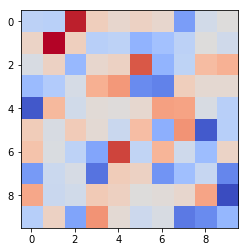

In [3]:
seed = 6
rand_mat = gen_ortho_matrix(10, np.random.RandomState(seed))
print(np.mean(rand_mat.flatten()))
print(np.std(rand_mat.flatten()))
plt.imshow(rand_mat,cmap='coolwarm')

In [297]:
np.linalg.matrix_rank(model_data['w_in'])

68

In [10]:
seed = 1
model_dir = './saved_models/debug'
hp = {'learning_rate': 0.001, 'n_rnn': 500, 'target_perf': 0.95,
          'use_separate_input': False, 'activation': 'relu',
          'use_w_mask': True, 'w_mask_type': 'basic_TC'}
ruleset='ctx_multi_sensory_delay'
default_hp = get_default_hp(ruleset)
if hp is not None:
    default_hp.update(hp)
hp = default_hp
hp['seed'] = 1
hp['rng'] = np.random.RandomState(seed)

In [19]:
model = Model(model_dir, hp=hp)
model.set_optimizer(var_list=model.var_list)


Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(568, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/biases:0' shape=(33,) dtype=float32>


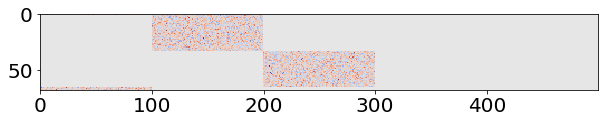

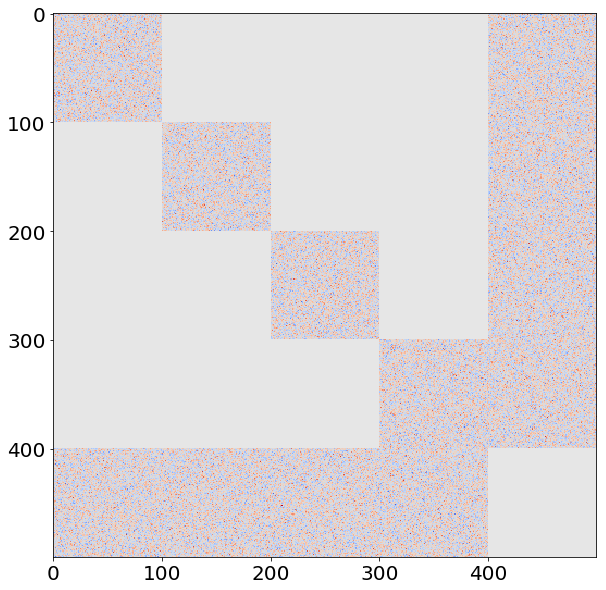

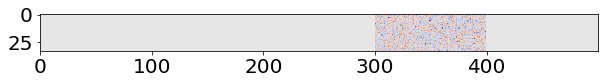

In [38]:
cmap = cm.get_cmap('coolwarm')
cmap.set_bad(color=[230/255,230/255,230/255])

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    weight_names = [w.name for w in model.weight_list]
    weight_list = [sess.run(w) for w in model.weight_list]
    
    for name, w in zip(weight_names, weight_list):
        w[w==0] = np.nan
        if not hp['use_separate_input'] and 'rnn' in name:
            plt.figure(figsize=[10,10])
            plt.imshow(w[:hp['n_input'],:],cmap=cmap)
            plt.figure(figsize=[10,10])
            plt.imshow(w[hp['n_input']:,:],cmap=cmap)
        elif 'output' in name:
            plt.figure(figsize=[10,10])
            plt.imshow(w.T,cmap=cmap)
        else:
            plt.figure(figsize=[10,10])
            plt.imshow(w,cmap=cmap)

In [165]:
inputs = tf.keras.Input((None, hp['n_input']), name='inputs')
rnn = tf.keras.layers.SimpleRNN(hp['n_rnn'], return_sequences=True, name='rnn')(inputs)
outputs = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(hp['n_output']), name='outputs')(rnn)

In [166]:
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [193]:
weights = model.get_weights()

(68, 500)
(500, 500)
(500,)
(500, 33)
(33,)


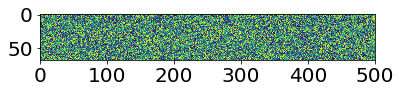

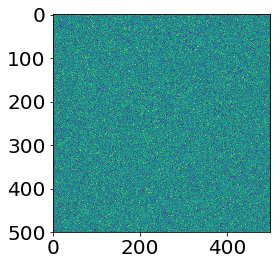

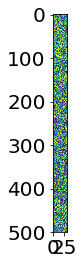

In [172]:
for w in weights:
    print(w.shape)
    if len(w.shape)>1:
        plt.figure()
        plt.imshow(w)

In [46]:
def reduce_weight_matrix(weights, pre_node_indexes='all', post_node_indexes='all', keep_recurrency=False):
    if pre_node_indexes == 'all':
        pre_node_indexes = range(weights.shape[0])
    if post_node_indexes == 'all':
        post_node_indexes = range(weights.shape[1])
        
    weights_to_zero = np.setdiff1d(range(weights[0].shape[0]),post_node_indexes)
    
    if keep_recurrency:
        if weights.shape[0] == weights.shape[1]:
            weights_to_zero = np.setdiff1d(weights_to_zero,pre_node_indexes)
        else:
            print('Weight matrix is not squared!')
        
    if len(weights_to_zero.shape):
        weights[np.ix_(pre_node_indexes,weights_to_zero)] = 0
        
    return weights

In [235]:
def sparsify_weight_matrix(weights, perc_weights_to_zero):
    
    seed = 1
    np.random.seed(seed)
    
    n_weights_to_zero = int(weights.shape[1]*perc_weights_to_zero)
    
    all_indexes = [[(i,j) for j in range(weights.shape[1])] for i in range(weights.shape[0])]

    for row_indexes in all_indexes:
        
        sampled_indexes = np.array([row_indexes[i] for i in np.random.choice(range(len(row_indexes)),
                                                                             size=n_weights_to_zero,
                                                                             replace=False)]).T
        weights[tuple(sampled_indexes)] = 0

    return weights

In [239]:
weights = model.get_weights()
input_to_rnn_w = weights[0]
print(input_to_rnn_w.shape)
print(sum(input_to_rnn_w.flatten()==0)/len(input_to_rnn_w.flatten()))

(68, 500)
0.0


In [240]:
input_to_rnn_w = sparsify_weight_matrix(weights[0], 0.8)
print(sum(input_to_rnn_w.flatten()==0)/len(input_to_rnn_w.flatten()))

0.8


In [184]:
#n_input = 1+num_ring*n_eachring+n_rule
input_to_rnn_w = weights[0]

# go and rule inputs to rnn
input_to_rnn_w = reduce_weight_matrix(input_to_rnn_w,pre_node_indexes=[0],post_node_indexes=range(0,100))
input_to_rnn_w = reduce_weight_matrix(input_to_rnn_w,pre_node_indexes=range(hp['n_input']-hp['n_rule'],hp['n_input']),post_node_indexes=range(0,100))

# modalities to rnn
input_to_rnn_w = reduce_weight_matrix(input_to_rnn_w,pre_node_indexes=range(1+0*hp['n_eachring'],1+1*hp['n_eachring']),post_node_indexes=range(100,200))
input_to_rnn_w = reduce_weight_matrix(input_to_rnn_w,pre_node_indexes=range(1+1*hp['n_eachring'],1+2*hp['n_eachring']),post_node_indexes=range(200,300))

In [130]:
#n_rnn = n_rnn_go_contex + n_rnn_mod1 + n_rnn_mod2 + n_rnn_motor + n_rnn_thalamus
rnn_w = weights[1]

# cortex modules to thalamus
rnn_w = reduce_weight_matrix(rnn_w,pre_node_indexes=range(0,100),post_node_indexes=range(hp['n_rnn']-100,hp['n_rnn']), keep_recurrency=True) #go and rule module
rnn_w = reduce_weight_matrix(rnn_w,pre_node_indexes=range(100,200),post_node_indexes=range(hp['n_rnn']-100,hp['n_rnn']), keep_recurrency=True) #mod 1 module
rnn_w = reduce_weight_matrix(rnn_w,pre_node_indexes=range(200,300),post_node_indexes=range(hp['n_rnn']-100,hp['n_rnn']), keep_recurrency=True) #mod 1 module
rnn_w = reduce_weight_matrix(rnn_w,pre_node_indexes=range(300,400),post_node_indexes=range(hp['n_rnn']-100,hp['n_rnn']), keep_recurrency=True) #motor module

# thalamus module to cortex
rnn_w = reduce_weight_matrix(rnn_w,pre_node_indexes=range(hp['n_rnn']-100,hp['n_rnn']),post_node_indexes=range(0,hp['n_rnn']-100), keep_recurrency=False) #thalamus module


In [131]:
#n_output = n_eachring+1
rnn_to_output_w = weights[3]

# rnn to outputs
rnn_to_output_w = reduce_weight_matrix(rnn_to_output_w.T,pre_node_indexes='all',post_node_indexes=range(300,400)).T

In [132]:
sum(rnn_w.flatten()==0).astype('int')/len(rnn_w.flatten())

0.52004

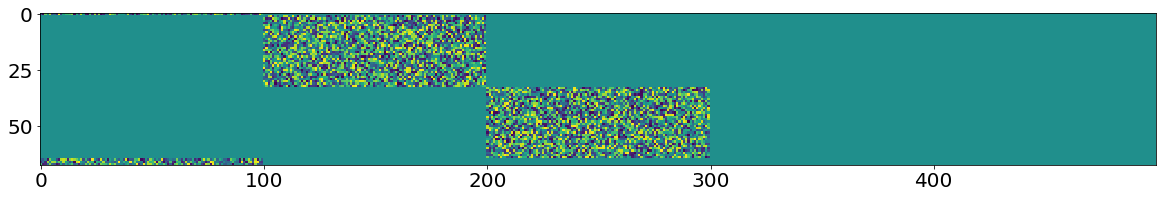

In [50]:
plt.figure(figsize=[20,20])
plt.imshow(input_to_rnn_w)
#plt.plot(input_to_rnn_w[0,:])

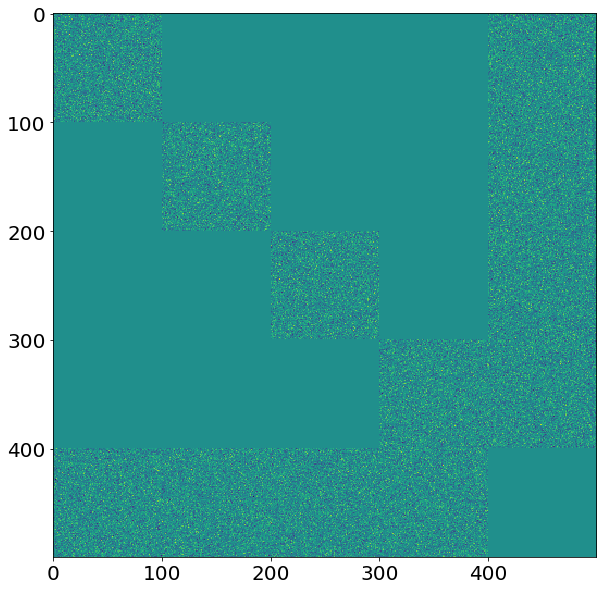

In [51]:
plt.figure(figsize=[10,10])
plt.imshow(rnn_w)
#plt.plot(rnn_w[0,:])

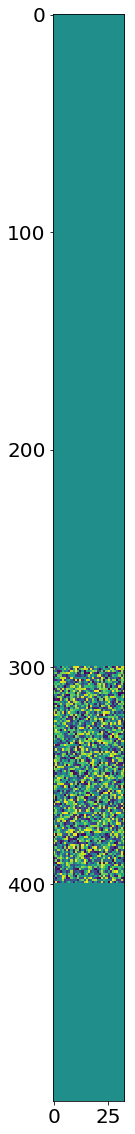

In [52]:
plt.figure(figsize=[20,20])
plt.imshow(rnn_to_output_w)
#plt.plot(rnn_to_output_w[0,:])

----

In [25]:
input_mod1 = tf.keras.Input((None, hp['n_eachring']), name='input_mod1')
input_mod2 = tf.keras.Input((None, hp['n_eachring']), name='input_mod2')
input_context_and_go = tf.keras.Input((None, hp['n_rule']+1), name='input_context_and_go')

rnn_mod1 = tf.keras.layers.SimpleRNN(hp['n_rnn'], return_sequences=True, name='rnn_mod1')(input_mod1)
dense_mod1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(hp['n_dense_CT']), name='dense_mod1')(rnn_mod1)

rnn_mod2 = tf.keras.layers.SimpleRNN(hp['n_rnn'], return_sequences=True, name='rnn_mod2')(input_mod2)
dense_mod2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(hp['n_dense_CT']), name='dense_mod2')(rnn_mod2)

rnn_context_and_go = tf.keras.layers.SimpleRNN(hp['n_rnn_contexts'], 
                                               return_sequences=True, 
                                               name='rnn_context_and_go')(input_context_and_go)
dense_context_and_go = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(hp['n_dense_CT']), 
                                                       name='dense_context_and_go')(rnn_context_and_go)

thal_hub = tf.keras.layers.Concatenate(name='thalamic_hub')([dense_mod1,dense_mod2,dense_context_and_go])

rnn_motor = tf.keras.layers.SimpleRNN(hp['n_rnn'], return_sequences=True, name='rnn_motor')(thal_hub)

output = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(hp['n_output']), name='outputs')(rnn_motor)

TC_model = tf.keras.models.Model(inputs=[input_mod1, input_mod2, input_context_and_go], outputs=output)

TC_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [59]:
max_steps=1e6
step = 0
while step * hp['batch_size_train'] <= max_steps:
    try:
        # Training
        rule_train_now = hp['rng'].choice(hp['rule_trains'],
                                          p=hp['rule_probs'])
        # Generate a random batch of trials.
        # Each batch has the same trial length
        trial = generate_trials(
            rule_train_now, hp, 'random',
            batch_size=hp['batch_size_train'])

        all_inputs = np.transpose(trial.x,(1,0,2))
        inputs_mod1 = all_inputs[:,:,1:(1+hp['n_eachring'])]
        inputs_mod2 = all_inputs[:,:,(1+hp['n_eachring']):(1+2*hp['n_eachring'])]
        inputs_context_and_go = np.concatenate([all_inputs[:,:,:1],all_inputs[:,:,(1+2*hp['n_eachring']):]],axis=2)
        
        targets = np.transpose(trial.y,(1,0,2))
        history = TC_model.fit([inputs_mod1,inputs_mod2,inputs_context_and_go], targets, epochs=20)

        # Generating feed_dict.
        # feed_dict = tools.gen_feed_dict(model, trial, hp)
        # sess.run(model.train_step, feed_dict=feed_dict)

        step += 1

    except KeyboardInterrupt:
        print("Optimization interrupted by user")
        break

print("Optimization finished!")


Train on 64 samples
Epoch 1/20
64/64 [==============================] - 2s 27ms/sample - loss: 0.0172 - accuracy: 0.7510
Epoch 2/20
64/64 [==============================] - 0s 2ms/sample - loss: 0.0169 - accuracy: 0.7519
Epoch 3/20
64/64 [==============================] - 0s 2ms/sample - loss: 0.0168 - accuracy: 0.7513
Epoch 4/20
64/64 [==============================] - 0s 2ms/sample - loss: 0.0166 - accuracy: 0.7489
Epoch 5/20
64/64 [==============================] - 0s 2ms/sample - loss: 0.0163 - accuracy: 0.7503
Epoch 6/20
64/64 [==============================] - 0s 2ms/sample - loss: 0.0163 - accuracy: 0.7494
Epoch 7/20
64/64 [==============================] - 0s 2ms/sample - loss: 0.0161 - accuracy: 0.7490
Epoch 8/20
64/64 [==============================] - 0s 2ms/sample - loss: 0.0160 - accuracy: 0.7500
Epoch 9/20
64/64 [==============================] - 0s 2ms/sample - loss: 0.0160 - accuracy: 0.7519
Epoch 10/20
64/64 [==============================] - 0s 3ms/sample - loss: 0.01

In [68]:
import time

model.save("./saved_models/my_TC_model_" + time.strftime("%Y%m%d-%H%M%S") + ".h5")
#model.save_weights('./checkpoints/my_checkpoint')

----

In [ ]:
import thalnet as TN
importlib.reload(TN)

In [14]:
tdim = None
batch_size = hp['batch_size_train']

inputs_sizes = [[batch_size,tdim,hp['n_eachring']+1], #[Batch, Time, Num_units]
                [batch_size,tdim,hp['n_eachring']],
                [batch_size,tdim,hp['n_rule']],
                None]

outputs_sizes = [None,
                 None,
                 None,
                 hp['n_output']] #[Num_units]

total_input_size = np.sum([sz[2] for sz in inputs_sizes if sz is not None])
total_output_size = np.sum([sz for sz in outputs_sizes if sz is not None])

rule_train_now = hp['rng'].choice(hp['rule_trains'],
                                          p=hp['rule_probs'])

trial = generate_trials(
    rule_train_now, hp, 'random',
    batch_size=hp['batch_size_train'])

inputs = np.transpose(trial.x,(1,0,2))
targets = np.transpose(trial.y,(1,0,2))

In [ ]:
importlib.reload(TN)
tf.keras.backend.clear_session()

thalnet_network = TN.ThalNet(TN.SimpleRNNCell, inputs_sizes, outputs_sizes, n_modules=hp['n_modules'])

# thalnet_network = tf.keras.models.Sequential([TN.ThalNet(TN.SimpleRNNCell, inputs_sizes, 
#                                                          outputs_sizes, n_modules=hp['n_modules'])])

                                                         

#print(inputs.shape)
outputs = thalnet_network(inputs)
print(outputs.shape)

In [73]:
thalnet_network.compile(loss="mse", optimizer="adam", run_eagerly=True)
history = thalnet_network.fit(trial.x, trial.y, epochs=1)

Train on 165 samples
165/165 [==============================] - 17s 101ms/sample - loss: 0.1174


In [ ]:
max_steps=1e2 #1e6
step = 0
while step * hp['batch_size_train'] <= max_steps:
    try:
        # Validation
        # if step % display_step == 0:
        #     log['trials'].append(step * hp['batch_size_train'])
        #     log['times'].append(time.time() - t_start)
        #     log = do_eval(sess, model, log, hp['rule_trains'])
        #     # if log['perf_avg'][-1] > model.hp['target_perf']:
        #     # check if minimum performance is above target
        #     if log['perf_min'][-1] > model.hp['target_perf']:
        #         print('Perf reached the target: {:0.2f}'.format(
        #             hp['target_perf']))
        #         break
        #
        #     if rich_output:
        #         display_rich_output(model, sess, step, log, model_dir)

        # Training
        rule_train_now = hp['rng'].choice(hp['rule_trains'],
                                          p=hp['rule_probs'])
        # Generate a random batch of trials.
        # Each batch has the same trial length
        trial = generate_trials(
            rule_train_now, hp, 'random',
            batch_size=hp['batch_size_train'])

        inputs = np.transpose(trial.x,(1,0,2))
        targets = np.transpose(trial.y,(1,0,2))
        history = thalnet_network.fit(inputs, targets, epochs=20)

        # Generating feed_dict.
        # feed_dict = tools.gen_feed_dict(model, trial, hp)
        # sess.run(model.train_step, feed_dict=feed_dict)

        step += 1

    except KeyboardInterrupt:
        print("Optimization interrupted by user")
        break

print("Optimization finished!")


In [7]:
# upgrade the .py files and copy all the other files to the outtree
!tf_upgrade_v2 \
    --intree v1_4/ \
    --outtree v2_0/ \
    --reportfile tree_report.txt

INFO line 114:13: Renamed 'tf.Session' to 'tf.compat.v1.Session'
INFO line 224:13: Renamed 'tf.Session' to 'tf.compat.v1.Session'
INFO line 666:13: Renamed 'tf.Session' to 'tf.compat.v1.Session'
WARNING line 915:4: *.save requires manual check. (This warning is only applicable if the code saves a tf.Keras model) Keras model.save now saves to the Tensorflow SavedModel format by default, instead of HDF5. To continue saving to HDF5, add the argument save_format='h5' to the save() function.
INFO line 934:9: Renamed 'tf.Session' to 'tf.compat.v1.Session'
TensorFlow 2.0 Upgrade Script
-----------------------------
Converted 1 files
Detected 1 issues that require attention
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
File: v1_4/my_rnn_functions.py
--------------------------------------------------------------------------------
v1_4/my_rnn_functions.py:915:4: WARNING: *.save req